### Using non-uniform Distribution
Now lets generate the same circle but with a higher chance for a low x value for each point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def create_non_uniform_data1(sample_num):
    data = {}
    for i in range(sample_num):
        x = min(np.random.uniform(), np.random.uniform())
        y = np.random.uniform()
        while (x-0.5)**2 + (y-0.5)**2 > 0.25:
            x = min(np.random.uniform(), np.random.uniform())
            y = np.random.uniform()
        data.update({i: (x, y)})
    
    return data

The rest of the code will be the same.

In [3]:
# Line
def create_neurons(neurons_num):
    neurons = {}
    for i in range(neurons_num):
        neurons.update({i: [0.45 + i/neurons_num * 0.1, 0.5]})
    
    return neurons

def decide_winner(p, N):
    min_dist = float("inf")
    winner_index = 0
    for n in N.keys():
        dist = 0
        for i in range(len(p)):
            dist += (p[i] - N[n][i])**2
        dist = math.sqrt(dist)
        if dist < min_dist:
            winner_index = n
            min_dist = dist
    return winner_index

def update_weights(N, c, X, alpha, sigma, radius):
    for j in range(c-radius, c+radius+1):
        if j in N:
            h = math.exp(-((c - j)**2)/(2*(sigma**2)))
            for i in range(len(X)):
                N[j][i] = N[j][i] + alpha * h * (X[i] - N[j][i])
    return N

def display(P, N, t):
    px, py = [], []
    for i in P.keys():
        px.append(P[i][0])
        py.append(P[i][1])

    nx, ny = [], []
    for i in N.keys():
        nx.append(N[i][0])
        ny.append(N[i][1])

    plt.plot(px, py, 'ro')
    plt.plot(nx, ny, 'bo-')
    plt.title("epoch = " + str(t))
    plt.show()

def train(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius):
    for t in range(epoches):
        if t % 50 == 0:
            display(P, N, t)
        for p in range(len(P)):
            alpha = learning_rate * (1-(t/epoches))
            sigma = neighborhood_size * (1-(t/epoches))
            radius = round(neighborhood_radius * (1-(t/epoches)))
            c = decide_winner(P[p], N)
            N = update_weights(N, c, P[p], alpha, sigma, radius)

    display(P, N, epoches)

# Matrix
def create_neurons_2D(sqrt_neurons_num):
    neurons = {}
    for i in range(sqrt_neurons_num):
        for j in range(sqrt_neurons_num):
            neurons.update({(i, j): [0.45 + i*(0.1/sqrt_neurons_num), 0.45 + j*(0.1/sqrt_neurons_num)]})
    
    return neurons

def update_weights_2D(N, c, X, alpha, sigma, radius):
    for j in N.keys():
        if (j[0]-c[0])**2 + (j[1]-c[1])**2 < radius**2:
            S = (c[0] - j[0])**2 + (c[1] - j[1])**2
            h = math.exp(-(S)/(2*(sigma**2)))
            for i in range(len(X)):
                N[j][i] = N[j][i] + alpha * h * (X[i] - N[j][i])
    return N

def display_2D(P, N, t):
    px, py = [], []
    for i in P.keys():
        px.append(P[i][0])
        py.append(P[i][1])
    plt.plot(px, py, 'ro')

    for i in range(int(math.sqrt(len(N)))):
        nx, ny = [], []
        for j in range(int(math.sqrt(len(N)))):
            nx.append(N[(i, j)][0])
            ny.append(N[(i, j)][1])
        plt.plot(nx, ny, 'bo-')
        nx, ny = [], []
        for j in range(int(math.sqrt(len(N)))):
            nx.append(N[(j, i)][0])
            ny.append(N[(j, i)][1])
        plt.plot(nx, ny, 'bo-')

    plt.title("epoch = " + str(t))
    plt.show()

def train_2D(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius):
    for t in range(epoches):
        if t % 50 == 0:
            display_2D(P, N, t)
        for p in range(len(P)):
            alpha = learning_rate * (1-(t/epoches))
            sigma = neighborhood_size * (1-(t/epoches))
            radius = round(neighborhood_radius * (1-(t/epoches)))
            c = decide_winner(P[p], N)
            N = update_weights_2D(N, c, P[p], alpha, sigma, radius)

    display_2D(P, N, epoches)

The line topology:

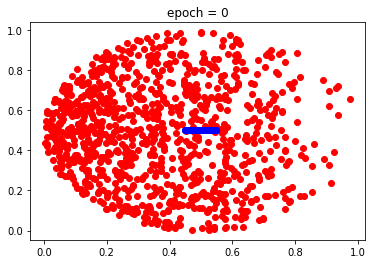

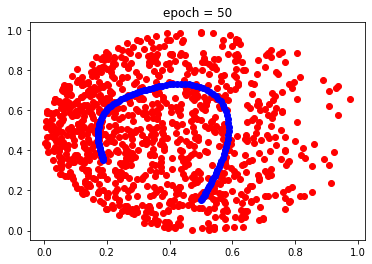

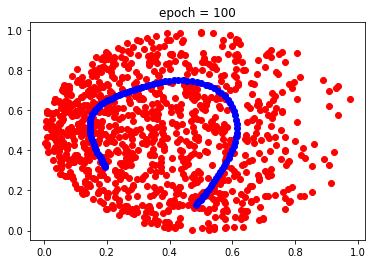

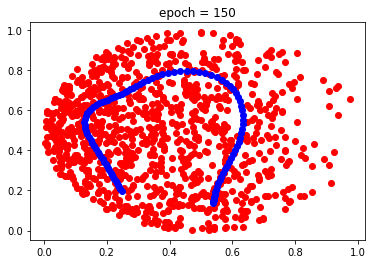

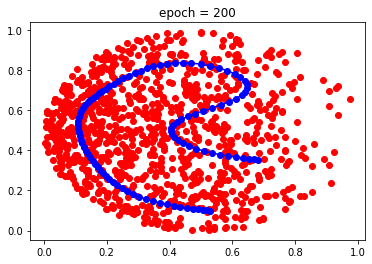

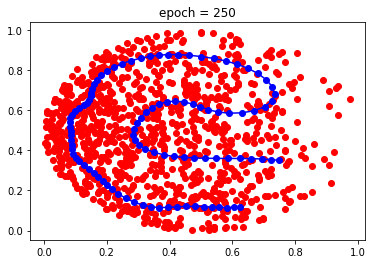

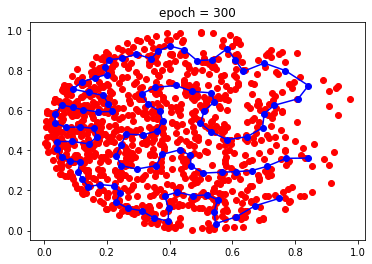

In [4]:
P = create_non_uniform_data1(1000)
N = create_neurons(100)

epoches = 300
learning_rate = 0.2
neighborhood_size = 15
neighborhood_radius = len(N)/2

train(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius)

We can see that with these input vectors, there are more neurons at the left side (where the x value is smaller), and the spaces between them are smaller as opposed to the right side.

The matrix topology:

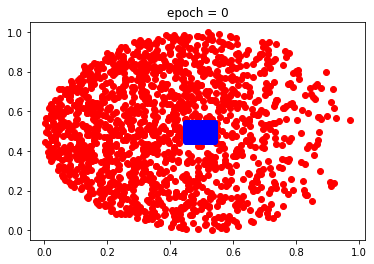

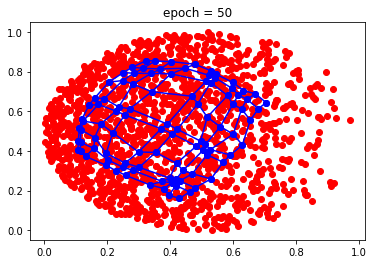

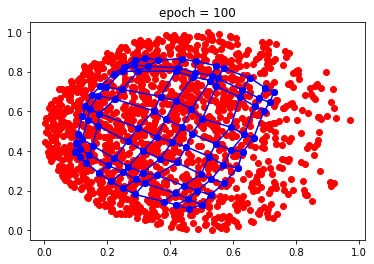

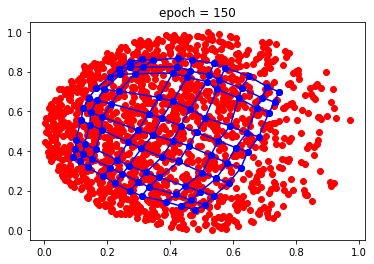

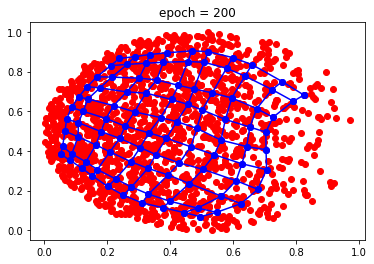

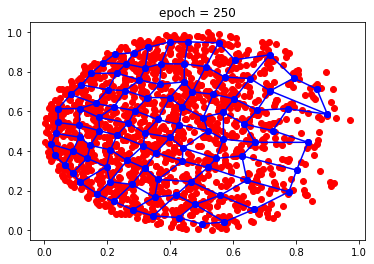

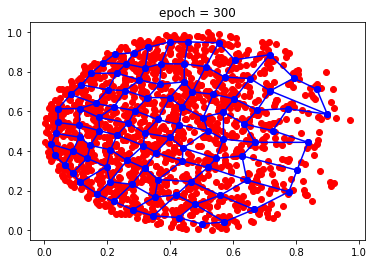

In [5]:
P = create_non_uniform_data1(1500)
N = create_neurons_2D(10)

epoches = 300
learning_rate = 0.1
neighborhood_size = 5
neighborhood_radius = math.sqrt(len(N))/2

train_2D(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius)

Here happens about the same case, there are generally less neurons at the right side and it doesn't spread across all that side.

Now lets generate the circle in a different non-uniform distribution: \
Instead of choosing x and y, we choose a distance from the middle (0.5, 0.5) and an angle, with a higher chance to get a larger distance.

In [10]:
def create_non_uniform_data2(sample_num):
    data = {}
    for i in range(sample_num):
        a = np.random.randint(0, 360)
        r = max(np.random.uniform(0, 0.5), np.random.uniform(0, 0.5), np.random.uniform(0, 0.5))
        x = r*math.cos(a) + 0.5
        y = r*math.sin(a) + 0.5
        data.update({i: (x, y)})
    
    return data

The line topology:

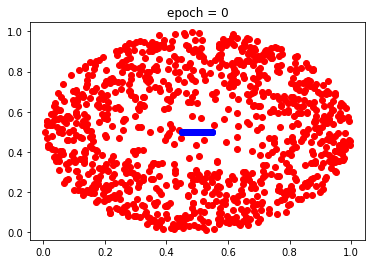

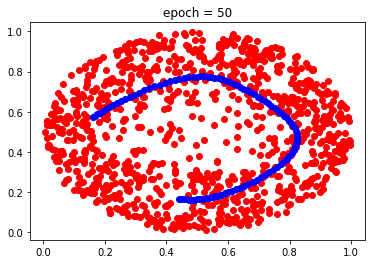

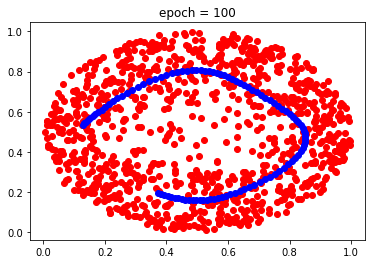

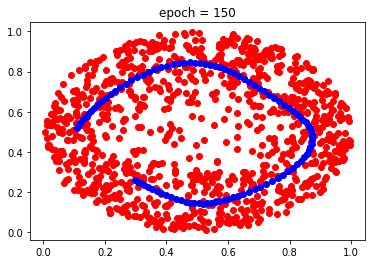

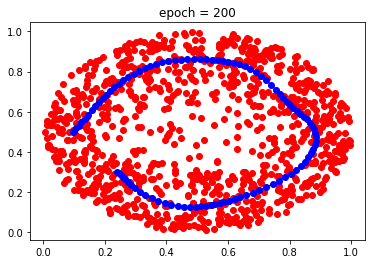

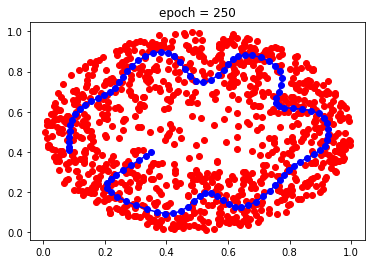

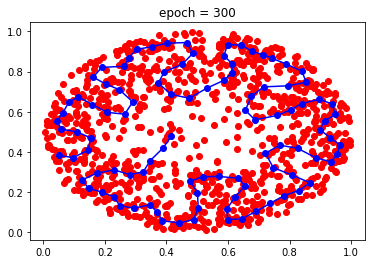

In [11]:
P = create_non_uniform_data2(1000)
N = create_neurons(100)

epoches = 300
learning_rate = 0.2
neighborhood_size = 15
neighborhood_radius = len(N)/2

train(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius)

Here we can see that the neurons begin farther from the middle, and at the end they bearly earch it as well. the spaces between the neurons are bigger the closer to the edge they are.

The matrix topology:

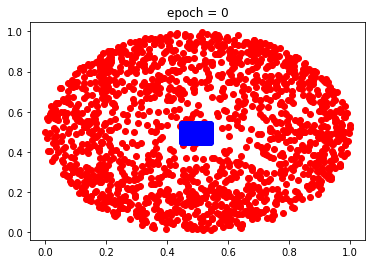

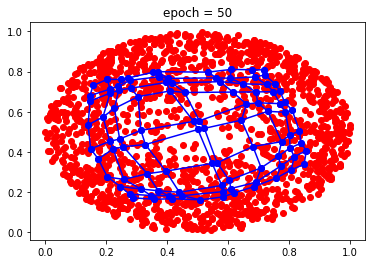

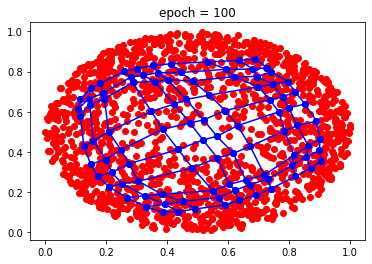

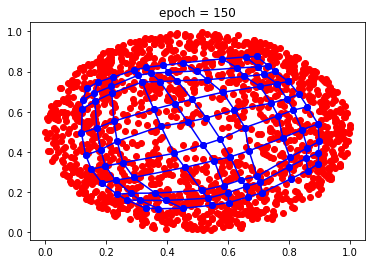

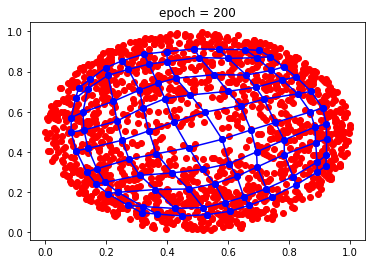

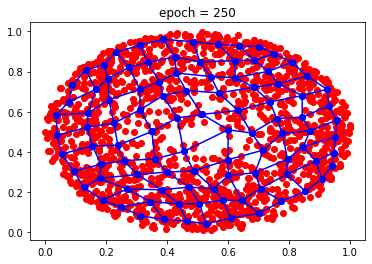

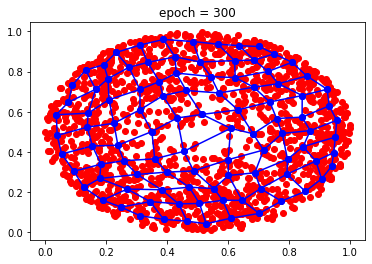

In [15]:
P = create_non_uniform_data2(1500)
N = create_neurons_2D()

epoches = 300
learning_rate = 0.1
neighborhood_size = 5
neighborhood_radius = 5

train_2D(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius)

The neurons are much more well spread closer to the edge or the disk, and become less "stable" near the center.
Again, the spaces are also bigger closer to the center.